In [7]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm

from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Serie 3: Tasa de Política Monetaria

In [19]:
df = pd.read_csv("../dataset/plazo_fijo_bch/historico2.csv")

df.head()

,Date,Tasa de política monetaria,Tipo de cambio Minorista,Suma de results.valor
0,2016-01-04 00:00:00,"33,00",13.31,NaN
1,2016-01-05 00:00:00,"33,00",13.88,NaN
2,2016-01-06 00:00:00,"32,00",14.04,NaN
3,2016-01-07 00:00:00,"32,00",14.16,NaN
4,2016-01-08 00:00:00,"32,00",14.10,NaN


In [9]:
# Convertir la columna 'date' a datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d 00:00:00')

# Convertir a formato 'yyyy-mm-dd'
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [20]:
df.drop(columns=['Tipo de cambio Minorista', 'Suma de results.valor'], inplace=True)
df.head()

,Date,Tasa de política monetaria
0,2016-01-04 00:00:00,"33,00"
1,2016-01-05 00:00:00,"33,00"
2,2016-01-06 00:00:00,"32,00"
3,2016-01-07 00:00:00,"32,00"
4,2016-01-08 00:00:00,"32,00"


In [21]:
df.rename(columns={'Tasa de política monetaria':'Tasa', 'Date':'Fecha'}, inplace=True)

In [22]:
df = df.set_index('Fecha') 
df = df.sort_index()
df.head()

,Tasa
Fecha,
2016-01-04 00:00:00,"33,00"
2016-01-05 00:00:00,"33,00"
2016-01-06 00:00:00,"32,00"
2016-01-07 00:00:00,"32,00"
2016-01-08 00:00:00,"32,00"


In [24]:
df['Tasa'] = df['Tasa'].str.replace(',', '.').astype(float)

In [26]:
df = df.dropna(subset=['Tasa'])

In [27]:
df.shape

(2060, 1)

In [28]:
stepwise_fit = auto_arima(df, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7061.829, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7073.476, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7071.421, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7071.676, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7071.489, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7059.777, Time=1.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7071.541, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7057.850, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7059.777, Time=1.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7071.064, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7055.851, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7069.688, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7069.433, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7057.779, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0]          

# Serie 4: Préstamos

In [4]:
df = pd.read_excel("../dataset/prestamos/prestamos.xlsx")

df.head()

,fecha,cantidad
0,2018-01-02,22
1,2018-01-03,32
2,2018-01-04,38
3,2018-01-05,18
4,2018-01-08,26


In [5]:
# Convertir la columna 'date' a datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d')

# Convertir a formato 'yyyy-mm-dd'
df['fecha'] = df['fecha'].dt.strftime('%Y-%m-%d')

In [6]:
df = df.set_index('fecha') 
df = df.sort_index()
df.head()

In [19]:
df.shape

(1609, 1)

In [20]:
df.describe()

,cantidad
count,1609.000000
mean,28.648229
std,96.200554
min,0.000000
25%,18.000000
50%,23.000000
75%,29.000000
max,2852.000000


In [ ]:
# Filtrar las fechas basadas en el año, extrayendo el año de la cadena de texto
pre_pandemia = df[df.index.str[:4].astype(int) < 2021]
pandemia = df[df.index.str[:4].astype(int) == 2021]
post_pandemia = df[df.index.str[:4].astype(int) > 2021]

In [21]:
post_pandemia.describe()

,cantidad
count,649.000000
mean,30.363636
std,17.798520
min,0.000000
25%,20.000000
50%,26.000000
75%,33.000000
max,107.000000


<h2>Ejercicio 1</h2>
Buscar 3 (tres) series de tiempo y exponer la problemática de interés analítico (es importante detallar cuáles fueron los motivos de elección y situar al lector en el contexto adecuado).

La serie de tiempo en cuestión fue elegida por necesidad de la empresa donde trabaja uno de los integrantes del grupo. Se trata de ciertos tipos de préstamos personales. El período de tiempo es desde el año 2018 a agosto de 2024. La granularidad es por día laboral, es decir, no se cuenta los fines de semana.

<h2>Ejercicio 2</h2>
Graficar las series originales. Analizar si es necesario diferenciarlas para convertirlas en estacionarias. 

Exponer los conceptos relacionados con la estacionariedad de la serie.

In [23]:
hist = px.histogram(df,  title=f"Histograma")
hist.show()

In [32]:
# Convertir el índice en una columna si aún no lo has hecho
df_copy = df.copy()
df_copy['fecha'] = df.index

# Extraer el año de la columna 'fecha'
df_copy['año'] = df_copy['fecha'].str[:4]  # Extraer el año de la fecha en formato 'yyyy-mm-dd'

# Crear el boxplot por año
fig = px.box(df_copy, x='año', y='cantidad', title='Boxplot de Cantidad por Año (Post Pandemia)', color='año')

# Mostrar el gráfico
fig.show()

In [11]:
# Crear un gráfico de serie de tiempo
fig = px.line(df, title='Serie de tiempo interactiva')

# Mostrar el gráfico interactivo
fig.show()

In [24]:
hist = px.histogram(post_pandemia,  title=f"Histograma")
hist.show()

In [34]:

# Convertir el índice en una columna si aún no lo has hecho
post_pandemia_copy = post_pandemia.copy()
post_pandemia_copy['fecha'] = post_pandemia.index

# Extraer el año de la columna 'fecha'
post_pandemia_copy['año'] = post_pandemia_copy['fecha'].str[:4]  # Extraer el año de la fecha en formato 'yyyy-mm-dd'

# Crear el boxplot por año
fig = px.box(post_pandemia_copy, x='año', y='cantidad', title='Boxplot de Cantidad por Año (Post Pandemia)', color='año')

# Mostrar el gráfico
fig.show()


In [16]:
# Crear un gráfico de serie de tiempo
fig = px.line(post_pandemia, title='Serie de tiempo interactiva')

# Mostrar el gráfico interactivo
fig.show()

Descomposición aditiva

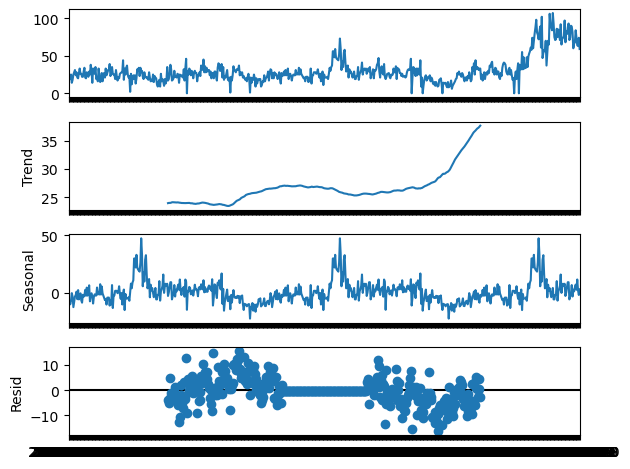

In [37]:
# Realizar la descomposición estacional aditiva
result = seasonal_decompose(post_pandemia, model='additive', period=252)

'''
"period=252" indica un ciclo completo anual basado en los días hábiles del mercado, que se usa con frecuencia en series temporales financieras.
'''

# Graficar los resultados
result.plot()
plt.show()

Descomposición multiplicativa

No se puede aplicar cuando hay ceros

<h2>Ejercicio 3</h2>
Graficar la FAS, FAC y FACP de las mismas en un solo gráfico y analizarlas. ¿Qué puede inferir de los gráficos?. 

Justificar con teoría.

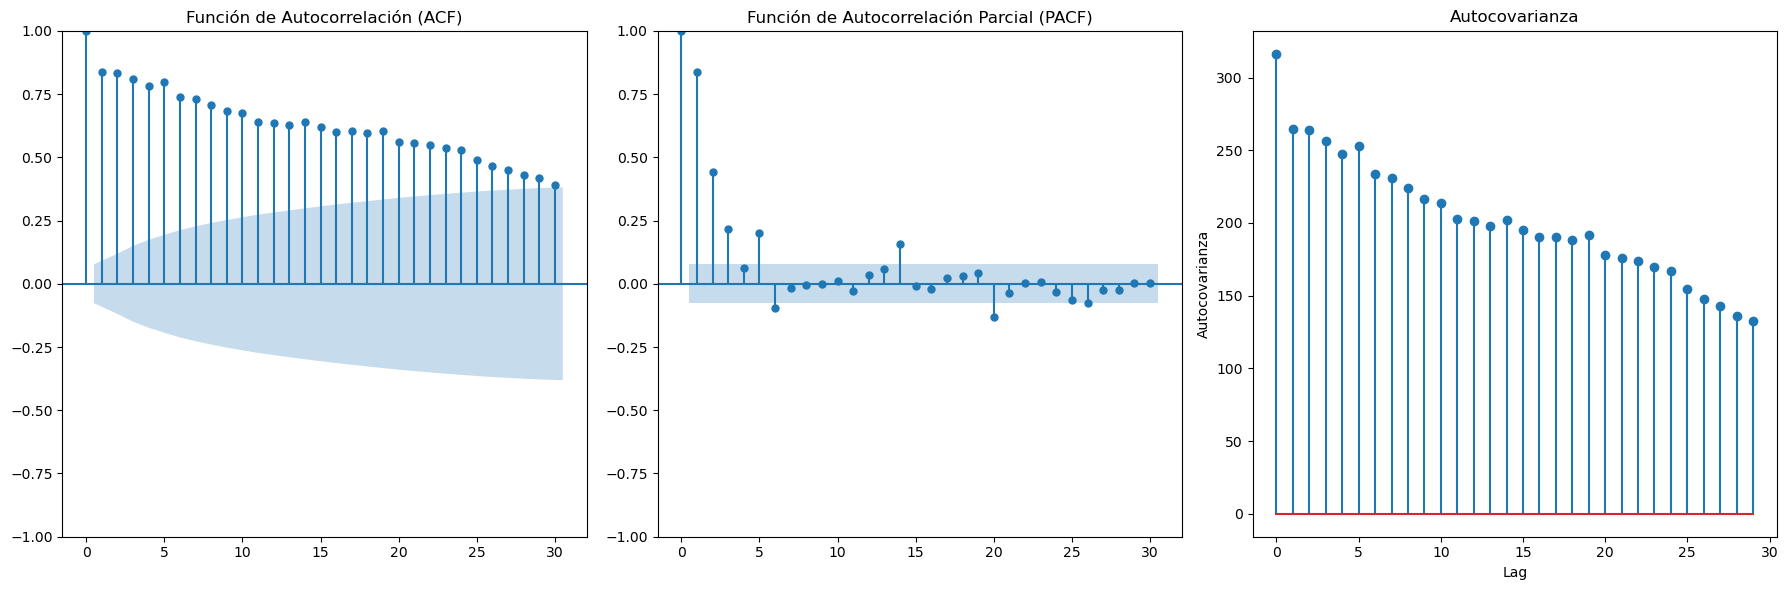

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Definir la serie de tiempo (columna cantidad)
Y = post_pandemia['cantidad']

# Crear el gráfico con subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Autocorrelación (ACF)
sm.graphics.tsa.plot_acf(Y, lags=30, ax=ax[0])
ax[0].set_title('Función de Autocorrelación (ACF)')

# Autocorrelación Parcial (PACF)
sm.graphics.tsa.plot_pacf(Y, lags=30, ax=ax[1])
ax[1].set_title('Función de Autocorrelación Parcial (PACF)')

# Función de autocovarianza personalizada
def autocovariance(series, lag):
    series_mean = np.mean(series)
    n = len(series)
    return np.sum((series[:n-lag] - series_mean) * (series[lag:] - series_mean)) / n

# Calcular la autocovarianza
lags = np.arange(30)
autocov = [autocovariance(Y.values, lag) for lag in lags]  # .values para usar los datos de la serie

# Gráfico de autocovarianza (sin el argumento use_line_collection)
ax[2].stem(lags, autocov)
ax[2].set_title('Autocovarianza')
ax[2].set_xlabel('Lag')
ax[2].set_ylabel('Autocovarianza')

# Mostrar el gráfico con layout ajustado
plt.tight_layout()
plt.show()




## Ejercicio 4
Realizar distintas pruebas de raíces unitarias para determinar si las series elegidas son o no estacionarias.

## Ejercicio 5

Efectuar una estimación de la serie temporal con distintos órdenes de parámetros de modelos SARIMA y encontrar aquel que se ajuste mejor a los datos (pueden emplear Criterios de Información/Selección y analizar significatividad individual y global de los parámetros del modelo).

## Ejercicio 6

Evaluar alguna métrica de performance teniendo en cuenta el entrenamiento del modelo entre Training Set y Testing Set.

## Ejercicio 7

Detallar una comparación con otros modelos estimados.


## Ejercicio 8

Efectuar un Análisis de Diagnóstico de las series temporales (Análisis sobre los Residuos del modelo, análisis gráfico de FAC, test de Ljung-Box, etc.).

## Ejercicio 9

Pronosticar con el modelo seleccionado para cada serie para una ventana temporal razonable, en función de la periodicidad y el comportamiento de las mismas.

##  Ejercicio 10
Construir un modelo de Vectores Autorregresivos (VAR) con las series elegidas para realizar predicciones sobre cada una de ellas.


## Ejercicio 11
Analizar la función impulso respuesta y realizar distintas pruebas para analizar la causalidad. 

Justificar la elección del modelo con todo lo visto en clase. Es posible complementar con otros análisis

## Ejercicio 12

En caso de presentar estacionalidad alguna de las series elegidas, se solicita determinar la representación más adecuada mediante algún modelo SARIMA y comparar los resultados con los modelos determinados en el trabajo anterior. 

(Opcional) Realizar la prueba de hipótesis de HEGY para testear la conjetura de raíz unitaria sobre las series elegidas.
